# Recommender system for a medical supplies company

<img src=https://miro.medium.com/v2/resize:fit:1400/1*q6ViBGiMyLyzsneD2OXPvQ.jpeg>

The main focus of this project is to facilitate the company's revenue growth by implementing an advanced recommender system that not only generates incremental sales but also prioritizes customer satisfaction as a key outcome.

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",181)

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('PBL5recommendationdata.csv', encoding='latin-1')

### Exploratory Data Analysis

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [4]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463408698,0.0,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,NaN,14.85,1.21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.463409e+09,NaN,paypal,PayPal,...,Shop CareLineMedical.com For the Top Rated Med...,"barf bag, emesis bags, vomit bags, barf bags, ...",NaN,NaN,Emesis-BagsBlue-2,0.0,PK,24 Each / Pack,NaN,1 PK,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,24.0,NaN,1.0,NaN,418.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.00,5.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463412756,NaN,17425,3732,Kennithe,Tecora,NaN,17425,NaN,NaN,NaN,USD,NaN,39.99,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Bed-Assist-Bar,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,1.0,NaN,0.0,NaN,128.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,14.60,4.10,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463413245,NaN,17426,3733,Tinna,Randall,NaN,17426,NaN,NaN,NaN,USD,NaN,1099.00,0.00,NaN,32.0,109.9,NaN,NaN,NaN,NaN,NaN,NaN,989.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,power scooter; electric power scooter; electri...,NaN,NaN,Spitfire-EX-Travel-4-Wheel-Mobility-Scooter-21...,0.0,EA,NaN,NaN,NaN,42.0,20.0,35.0,No,Not Made With Natura,8.223830e+11,NaN,NaN,http://www.drivemedical.com/product-manuals/sp...,NaN,K0800,NaN,NaN,0.0,NaN,128.0,1099.00,NaN,Limited Lifetime on Frame; 14 Month Limited on...,0.0,NaN,Universal,Basic Assembly Required,No Installation Required,45.00,20.75,20.75,127.0,Ships Same Day,https://www.drivemedical.com/power-mobility/sp...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,Na

In [5]:
df.shape

(4194, 181)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


#### Missing data

In [7]:
df.isnull().sum().sort_values(ascending=False)

Products.freight_cost             4194
Orders.mailing                    4194
Orders.gift_message               4194
Orders.registry_id                4194
Products.right_flag               4194
Orders.sales_rep                  4194
Products.markup                   4194
Orders.payment_ref                4194
Products.websites                 4194
Orders.purchase_order             4194
Orders.gift_id                    4194
Orders.gift_amount                4194
Products.price_breaks             4194
Products.seo_footer               4194
Products.default_quantity         4194
Orders.shipping_flags             4194
Products.price_break_type         4194
Orders.shipping_trans             4194
Orders.website                    4194
Products.amazon_type              4194
Order_Items.account_id            4194
Order_Items.attributes            4194
Order_Items.attribute_prices      4194
Products.menu_name                4194
Order_Items.registry_item         4194
Order_Items.related_id   

 #### Calculate find the most popular product using maximum sales by volume and dollar amount

In [8]:
popular_product_by_qty=df.groupby('Products.name')['Order_Items.qty'].sum().sort_values(ascending=False)
popular_product_by_qty 

Products.name
Disposable Emergency Blanket,Not Applicable               396
MoliCare Disposable Super Plus Briefs,27"-47"             228
2-Ply Tissue/Poly Professional Towels,Not Applicable      220
Sanitary Pads with Adhesive & Wings                       133
Emesis Bags,Blue,36.000 OZ                                129
                                                         ... 
Protection Plus Classic Protective Underwear,Small          1
Protection Plus Classic Protective Underwear,X-Large        1
Deluxe Two Button Folding Walker                            1
Deluxe Static Air Overlay                                   1
sEMG - single use uni-gel electrodes only, case of 100      1
Name: Order_Items.qty, Length: 1391, dtype: int64

<font color= 'dark'> Disposable Emergency Blanket,Not Applicable ->     396 </font>

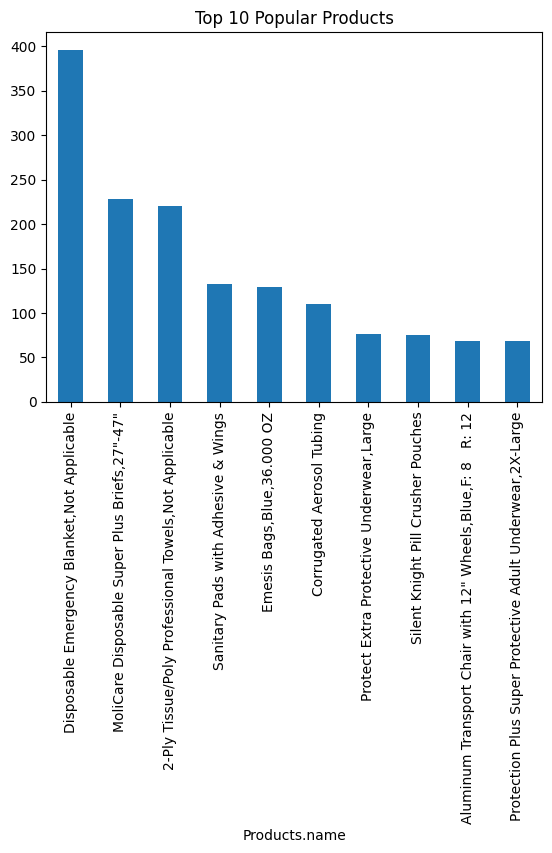

In [9]:
top10=popular_product_by_qty.head(10)
top10.plot(kind='bar')
plt.title('Top 10 Popular Products');

In [10]:
df['Sales_Amount']=df['Order_Items.qty'] * df['Order_Items.price']
popular_product_by_amount=df.groupby('Products.name')['Sales_Amount'].sum().sort_values(ascending=False)
popular_product_by_amount

Products.name
Disposable Emergency Blanket,Not Applicable                   13705.56
MoliCare Disposable Super Plus Briefs,27"-47"                 12542.26
Aluminum Transport Chair with 12" Wheels,Red,F: 8   R: 12      8449.00
Aluminum Transport Chair with 12" Wheels,Blue,F: 8   R: 12     8420.49
K1 Basic Extra-Wide Wheelchairs                                7107.47
                                                                ...   
CarraScent Odor Eliminators,1.000 OZ                              7.56
Stack a Pans,Graphite                                             7.28
Leg Bags with Twist Valve                                         7.28
OR Sterile Specimen Containers,120.0 ML                           5.68
Male External Catheters,Medium                                    4.24
Name: Sales_Amount, Length: 1391, dtype: float64

<font color= 'dark'> Disposable Emergency Blanket,Not Applicable ->     13705.56$ </font>

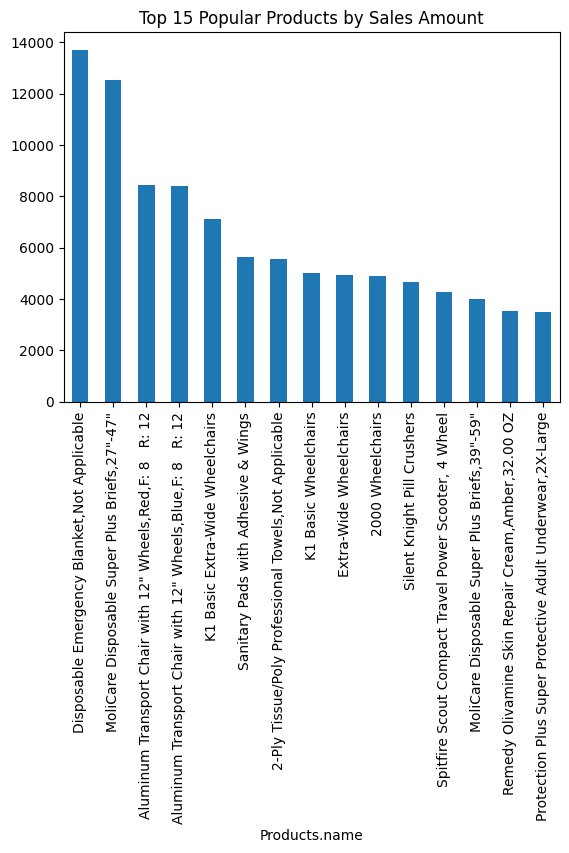

In [11]:
top15=popular_product_by_amount.head(15)
top15.plot(kind='bar')
plt.title('Top 15 Popular Products by Sales Amount');

####  Company with a maximum purchase

In [12]:
max_purchase_company=df.groupby('Orders.company')['Orders.payment_amount'].sum().sort_values(ascending=False)
max_purchase_company

Orders.company
Company59     12790.69
Company207     9502.36
Company145     8530.28
Company159     7505.44
Company130     7330.23
                ...   
Company369       10.56
Company392        8.91
Company375        6.98
Company259        0.00
Company312        0.00
Name: Orders.payment_amount, Length: 427, dtype: float64

<font color= 'dark'> Company59 ->     12790.69 </font>

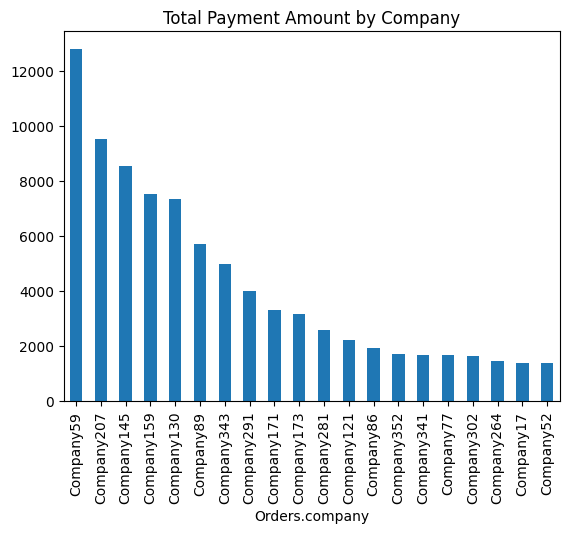

In [13]:
top20=max_purchase_company.head(20)
top20.plot(kind='bar')
plt.title('Total Payment Amount by Company');

#### Build a popularity-based recommender system

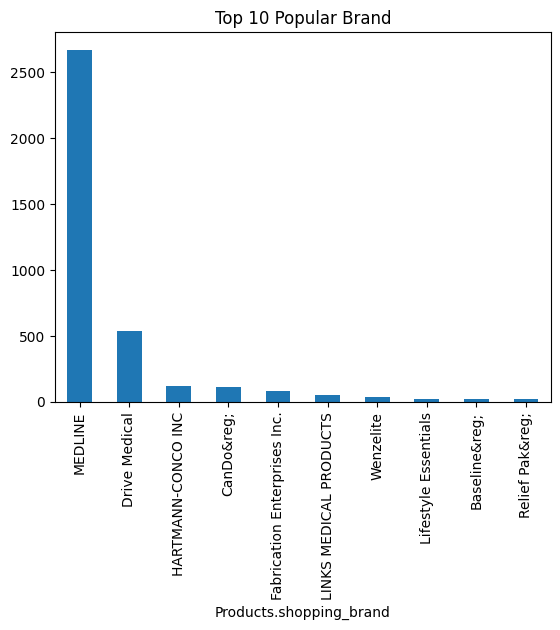

In [14]:
popular_brand=df['Products.shopping_brand'].value_counts().head(10)
popular_brand.plot(kind='bar')
plt.title('Top 10 Popular Brand');

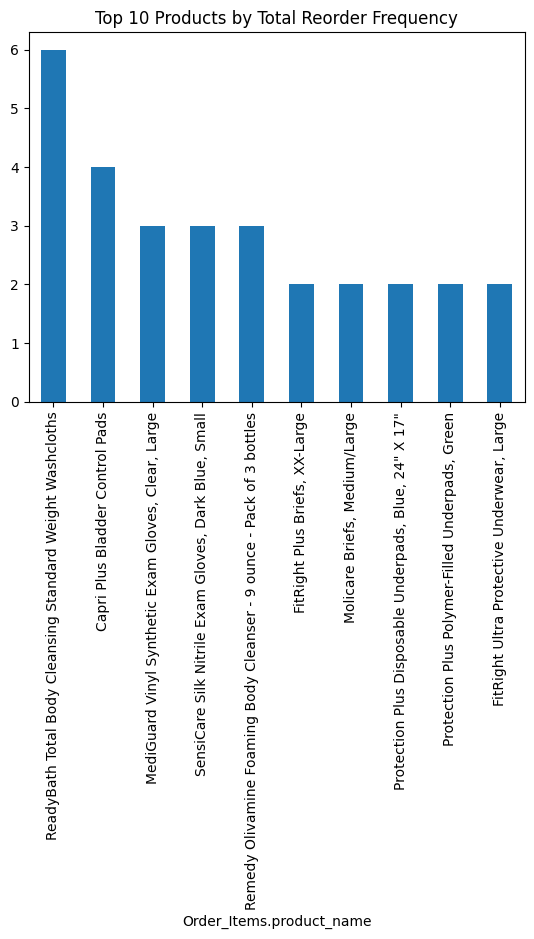

In [15]:
reorder_freq=df.groupby('Order_Items.product_name')['Order_Items.reorder_frequency'].sum().sort_values(ascending=False).head(10)
reorder_freq.plot(kind='bar')
plt.title('Top 10 Products by Total Reorder Frequency');

#### Build a recommender system using matrix factorization

In [16]:
matrix=pd.pivot_table(df, values='Orders.payment_amount', index='Orders.id', columns='Order_Items.product_name', fill_value=0)
matrix

Order_Items.product_name,"BUCKET, REPLACEMENT FOR MDS89668XW",1 Box Of Medline Commode Liners with Absorbent Pad,1 Pad of CURAD Mediplast Wart Pad,"1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large","1/2"" self-adhesive hook material, 25 yard dispenser box, white","1/2"" self-adhesive loop material, 25 yard dispenser box, white","100% Cotton Unisex Reversible Hyperbaric Scrub Tops, Misty Green, MZS","100% Cotton Unisex Reversible Tops, Ceil Blue, MHS",10215-s,12112-3,12124-3,"18"" Hamper Stands, Standard","19"" Flyweight Lightweight Blue Transport Wheelchair","2"" self-adhesive loop material, 10 yard dispenser box, tan","2"" self-adhesive loop material, 25 yard dispenser box, tan","2-Ply Tissue/Poly Professional Towels, White, Not Applicable",2000 Extra-Wide Wheelchairs,2000 Wheelchairs,"24 Hour Urine Collection Bottle, 3000.0 ML","3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 30x40, Elephant","3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 34x40, Footprints",3 Wheel Flame Blue Rollator Walker with Basket Tray and Pouch,3 Wheel Flame Red Rollator Walker with Basket Tray and Pouch,"3 Wheel Walker Rollator with Basket Tray and Pouch, Flame Blue","3 Wheel Walker Rollator with Basket Tray and Pouch, Flame Red","3"" Wheels For Walkers","3/4"" Guardian Utility Tips, Gray","4-Panel Abdominal Binders, 2X-Large","4-Panel Abdominal Binders, Large/X-Large","5"" Wheels For Walkers","6 Cylinder Oxygen Carrier, M9 Cylinders",6' CPAP Tube,6-spring hand grip (each),6291hda Universal wheels part,"8"" Rear Walker Wheel Attachment","A&D Ointment by H & H Laboratories Inc, 384.00 ML",Accu-Therm Hot/Cold Gel Packs,Accu-Therm Insulated Hot Pack,Accu-Therm Non-Insulated Hot Pack,"Accutouch Chemo Nitrile Exam Gloves, Blue, Medium","Active Liquid Protein Nutritional Supplement, 0.0","Active Liquid Protein Nutritional Supplement, 30.000 OZ",AcuForce&reg; 7.0 Massage Tool,Adaptive Eating Utensils - Adaptive Fork,Addipak Sterile Saline Solution,Adjustable Angle Rotating Suction Cup Grab Bar,Adjustable Height ArmRest AK5ADJARMKIT,Adjustable Height Bathtub Grab Bar Safety Rail,Adjustable Height Home Bed Assist Handle,"Adjustable Height Rollator with 6"" Wheels, Red",...,"Walker Rollator with 6"" Wheels, Fold Up Removable Back Support and Padded Seat, Red","Walker Rollator with 6"" Wheels, Fold Up Removable Back Support, and Padded Seat","Walker Rollator with Fold Up Removable Back Support and Padded Seat, Blue","Walker Rollator with Fold Up Removable Back Support and Padded Seat, Green","Walker Rollator with Fold Up Removable Back Support and Padded Seat, Red",Walker Ski/Glider,"Walking Crutches with Underarm Pad and Handgrip, Youth","Wall mat hanger, 86"" L x 8"" H x 16"" D, 10 capacity",Wallaby Headrest Extension,"Wallaby Pediatric Folding Wheelchair, 12"" Seat","Wallaby Pediatric Folding Wheelchair, 14"" Seat","Washable Cotton Gait Belts, Black","Washable Cotton Gait Belts, Yellow","Washable Cotton Material Gait Belts, Red, White & Blue Stripes","Water-Soluble Hamper Liners, Clear 26""x33""","Waterproof Cast Protector, Arm Cast",WaxWel&reg; Paraffin Bath - Accessory Package - 6 Terry Hand Mitts ONLY,"Wedge Cushion with Stretch Cover, 18""",Wheelchair Anti-Fold/Anti-Theft Devices,Wheelchair Carry Pouch for Oxygen Cylinders,Wheelchair Drainage Bag Holders,Wheelchair Elevating Legrest Assembly Part,Wheelchair IV Pole Attachments,"Wheelchair Oxygen Tank Holder by Maddak, Black",Wheelchair Rear Anti-Tip Devices,"Wheelchair Seat Belt, Auto Style Closure, 48""","Wheelchair Seat Belt, Auto Style Closure, 60""","Wheelchair Seat Belt, Hook-and-Loop Fasteners, 60""",Wheelchair Wheel Lock/Brake Assembly,"Wheelchair tray with rim and straps, 24"" x 20"", wood finish","Wheelchair tray, economy, 24"" x 20"", wood finish",Winnie Deluxe 3 Wheel Walker Rollator,Winnie Lite Supreme 3 Wheel Walker Rollator,"Winnie Wagon All Purpose Shopping Utility Cart, Black","Wooden Applicator Sticks, 6.00 IN",Wound Measuring Bullseye,W

In [17]:
import numpy as np
from scipy.sparse.linalg import svds

# Perform Singular Value Decomposition (SVD)
U, sigma, Vt = np.linalg.svd(matrix, full_matrices=False)

# Define the number of latent factors for matrix factorization
num_factors = 10

# Reduce the dimensionality of the matrices
U = U[:, :num_factors]
sigma = np.diag(sigma[:num_factors])
Vt = Vt[:num_factors, :]

# Reconstruct the matrix using the latent factors
reconstructed_matrix = np.dot(np.dot(U, sigma), Vt)

# Example: Get top-N recommendations for a given user
user_row_index = 0  # Replace with the actual row index of the user in the matrix
user_ratings = reconstructed_matrix[user_row_index, :]
sorted_indices = np.argsort(user_ratings)[::-1]

N = 10  # Define the number of top recommendations to retrieve
recommended_indices = sorted_indices[:N]
recommended_items = matrix.columns[recommended_indices]

# Print the recommended items
recommended_items

Index(['Sanitary Pads with Adhesive & Wings',
       'Baseline&reg; Dynamometer - Smedley Spring - Adult - 220 lb Capacity',
       '2-Ply Tissue/Poly Professional Towels, White, Not Applicable',
       'First Class School Chair Leg Extension',
       'First Class School Chair, Large',
       'First Class School Chair Dining Tray, Large',
       'First Class School Chair Support Kit, Large',
       'First Class School Chair Support Kit, Small',
       'First Class School Chair Hip Guide, 1 Pair',
       'First Class School Chair, Small'],
      dtype='object', name='Order_Items.product_name')

One of the most common applications of matrix factorization is in recommendation systems. In this context, it is used to model the relationships between users and items and predict missing information based on a user's past preferences or behavior. Matrix factorization is utilized to identify new items or content that can be recommended to a user.

#### Cosine similarity for product description

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv=CountVectorizer()

In [19]:
sparse_matrix=cv.fit_transform(df)

# Convert the sparse matrix to a dense matrix
doc_term_matrix = sparse_matrix.todense()

# Create a DataFrame with the dense matrix and column names
df = pd.DataFrame(doc_term_matrix, columns=cv.get_feature_names_out())

df

,account_id,amazon_asin,amazon_item_type,amazon_price,amazon_type,arm_style,assembly,attribute_names,attribute_prices,attributes,audio,balance_due,case_qty,comments,company,cost,coupon_amount,coupon_id,create_date,currency,customer_id,customer_type,customers,default_quantity,discount_amount,discount_name,display_name,display_packaging,external_id,external_source,family_id,features_title,fee_amount,fee_name,flags,fname,freight_cost,gift_amount,gift_id,gift_message,google_adwords,google_shopping_cat,google_shopping_id,google_shopping_label,google_shopping_type,handling_time,hcpcs,height,hygienic,id,...,seat_size,seo_category,seo_description,seo_footer,seo_header,seo_keywords,seo_title,seo_url,shipped_date,shipping,shipping_carrier,shipping_flags,shipping_height,shipping_length,shipping_method,shipping_trans,shipping_weight,shipping_width,shopping_age,shopping_brand,shopping_cat,shopping_color,shopping_flags,shopping_gender,shopping_gtin,shopping_mpn,shopping_type,shopzilla_cat,short_description,size,status,subtotal,tax,tax_exempt,taxable,template,thefind_cat,total,tracking,unit,upc,updated_date,user_size,vendor,video,warranty,website,websites,weight,width
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
cosine_similarity(df,df)

array([[1. , 0.5, 0.5, ..., 0. , 0. , 0. ],
       [0.5, 1. , 0.5, ..., 0. , 0. , 0. ],
       [0.5, 0.5, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0.5, 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

Cosine similarity is a metric used to measure the similarity between two vectors in a high-dimensional space. 

By representing each product description as a vector in a high-dimensional space, where each dimension corresponds to a unique word or term, cosine similarity calculates the cosine of the angle between the two vectors. The resulting value ranges from -1 to 1, where a value of 1 indicates that the two descriptions are identical, 0 indicates no similarity, and -1 indicates complete dissimilarity.